In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
import tensorflow as tf

In [4]:
x_data = np.linspace(0,10,1000000)

In [6]:
noise = np.random.randn(len(x_data))

In [8]:
noise.shape

(1000000,)

y = mx+b

b = 5

In [10]:
y_true = (0.5*x_data) + 5 + noise

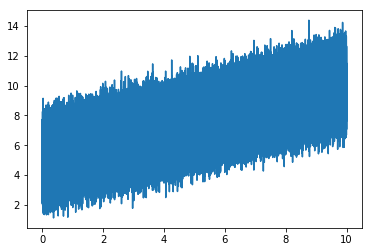

In [11]:
plt.plot(x_data,y_true)

In [13]:
x_df = pd.DataFrame(data = x_data,columns = ['X Data'])

In [14]:
y_df = pd.DataFrame(data = y_true, columns = ['Y Data'])

In [17]:
y_df.head()

,Y Data
0,3.939898
1,3.313011
2,6.954883
3,3.987024
4,5.359292


In [19]:
my_data = pd.concat([x_df,y_df],axis=1)

In [21]:
my_data.head()

,X Data,Y Data
0,0.00000,3.939898
1,0.00001,3.313011
2,0.00002,6.954883
3,0.00003,3.987024
4,0.00004,5.359292


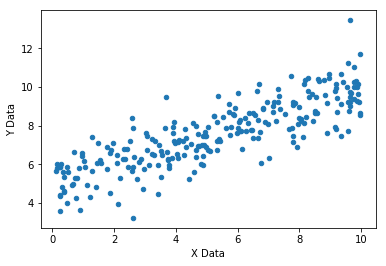

In [30]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y Data')

In [31]:
batch_size = 8

In [33]:
m = tf.Variable(0.81)
b = tf.Variable(0.17)

In [34]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [35]:
y_model = m*xph + b

In [36]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [37]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [38]:
init = tf.global_variables_initializer()

In [42]:
with tf.Session() as sess:
    
    sess.run(init)
    
    #Feed in 1000 batches of data with 8 data points each
    batches = 1000 
    
    for i in range(batches):
        #Random 8 integers which correspond to random index
        rand_ind = np.random.randint(len(x_data),size = batch_size) 
        
        #Feed the selected 8 data points
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]} 
        
        sess.run(train,feed_dict = feed) #Trains
    
    model_m, model_b = sess.run([m,b])
    
    

In [43]:
model_m

0.4974317

In [44]:
model_b

4.934502

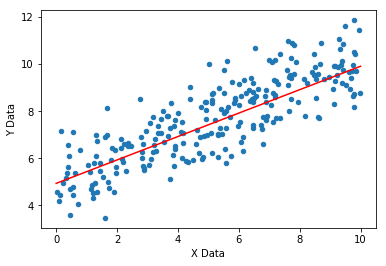

In [45]:
y_hat = x_data*model_m+model_b

my_data.sample(250).plot(kind='scatter',x='X Data',y='Y Data')
plt.plot(x_data,y_hat,'r')

# Regression Example 2: TF Estimator API

In [46]:
feat_cols = [tf.feature_column.numeric_column('x',shape =[1])] #Needs to be a list, thus swaure brackets around

In [47]:
feat_cols

[NumericColumn(key='x', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [48]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_protocol': None, '_experimental_max_worker_delay_secs': None, '_num_worker_replicas': 1, '_device_fn': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fbea6ec2748>, '_is_chief': True, '_save_checkpoints_secs': 600, '_tf_random_seed': None, '_task_id': 0, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmppxd7js1b', '_num_ps_replicas': 0, '_task_type': 'worker', '_evaluation_master': '', '_master': '', '_save_summary_steps': 100, '_global_id_in_cluster': 0, '_log_step_count_steps': 100, '_eval_distribute': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_train_distribute': None, '_service': None, '_save_checkpoints_steps': None, '_experimental_distribute': None}


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size = 0.3, random_state = 101)

In [53]:
print(x_train.shape)

(700000,)


In [54]:
x_eval.shape

(300000,)

In [55]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size = 8, num_epochs =None, shuffle=True)

In [56]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size = 8, num_epochs =1000, shuffle=False)

In [57]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size = 8, num_epochs =1000, shuffle=False)

In [58]:
estimator.train(input_fn=input_func,steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmppxd7js1b/model.ckpt.
INFO:tensorflow:loss = 428.95654, step = 1
INFO:tensorflow:global_step/sec: 1353.25
INFO:tensorflow:loss = 28.463968, step = 101 (0.074 sec)
INF

In [59]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-07-26T22:13:41Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmppxd7js1b/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-07-26-22:13:42
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.090324, global_step = 1000, label/mean = 7.534249, loss = 8.722592, prediction

In [60]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-07-26T22:14:43Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmppxd7js1b/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-07-26-22:14:44
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0730217, global_step = 1000, label/mean = 7.4773064, loss = 8.584173, prediction/mean = 7.265725
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 100

In [61]:
print('TRAINING DATA METRICS')
print(train_metrics)

TRAINING DATA METRICS
{'average_loss': 1.090324, 'global_step': 1000, 'loss': 8.722592, 'label/mean': 7.534249, 'prediction/mean': 7.2865515}


In [62]:
print('EVAL DATA METRICS')
print(eval_metrics)

EVAL DATA METRICS
{'average_loss': 1.0730217, 'global_step': 1000, 'loss': 8.584173, 'label/mean': 7.4773064, 'prediction/mean': 7.265725}


In [63]:
#loss indicates if the data is being overfit, read more on this later

In [65]:
new_data = np.linspace(0,10,10)
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':new_data},shuffle=False)

In [67]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmppxd7js1b/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.4019895], dtype=float32)},
 {'predictions': array([5.042715], dtype=float32)},
 {'predictions': array([5.6834407], dtype=float32)},
 {'predictions': array([6.324166], dtype=float32)},
 {'predictions': array([6.9648914], dtype=float32)},
 {'predictions': array([7.6056166], dtype=float32)},
 {'predictions': array([8.246343], dtype=float32)},
 {'predictions': array([8.887068], dtype=float32)},
 {'predictions': array([9.527794], dtype=float32)},
 {'predictions': array([10.168519], dtype=float32)}]

In [69]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmppxd7js1b/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [70]:
predictions

[array([4.4019895], dtype=float32),
 array([5.042715], dtype=float32),
 array([5.6834407], dtype=float32),
 array([6.324166], dtype=float32),
 array([6.9648914], dtype=float32),
 array([7.6056166], dtype=float32),
 array([8.246343], dtype=float32),
 array([8.887068], dtype=float32),
 array([9.527794], dtype=float32),
 array([10.168519], dtype=float32)]

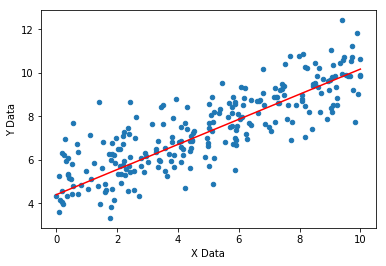

In [71]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y Data')
plt.plot(new_data,predictions,'r')